# Plotting for Exploratory data analysis (EDA)¶


1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

# Objective


The objective of classifying the survival status of a new patient based on the given features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
Haberman = pd.read_csv("haberman.csv")

In [2]:
Haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# (Q) how many data-points and features?

# (A) In Haberman Database 4 Features and 306 data point
Haberman.shape

(306, 4)

In [4]:
#(Q) What are the column names in our dataset?
#(A) In Haberman Database 4 Column  -- 1. Age 2.Year 3.Nodes and 4. Status
Haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
#(Q) How many data points for each class are present? 
#(A) In Haberman Database  status 1 --> 225 datapoint
                          #status 2 --> 81  Datapoint 
    
# Survival status (class attribute) 1 = the patient survived    2 = the patient died 
# It is a inbalanced dataset as the number of data points for  survived (1) --> 73.5% and died(2) --> ~ 26.5%

In [6]:
Haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [7]:
#(Q) Is data  missing in Dataset ?
#(A) There are no missing values in this dataset. So there is no need to do data imputation.
Haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
# To know statistical summary 
Haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 2-D Scatter Plot


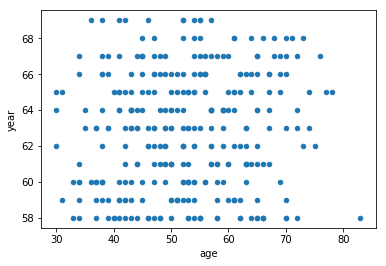

In [9]:
Haberman.plot(kind='scatter', x='age', y='year') ;
plt.show()

#Draw scatter plot between Age and year 
#cannot make much sense out it. 

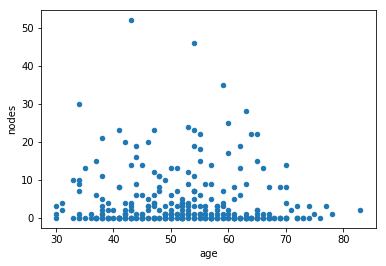

In [10]:
Haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.show()
#Draw scatter plot between Age and nodes 
#cannot make much sense out it. 

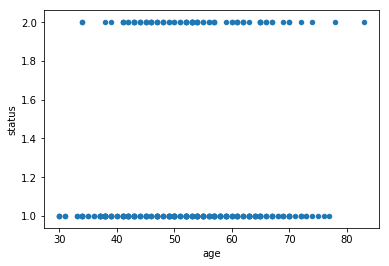

In [11]:
Haberman.plot(kind='scatter', x='age', y='status') ;
plt.show()
#Draw scatter plot between Age and Status 
#cannot make much sense out it. 

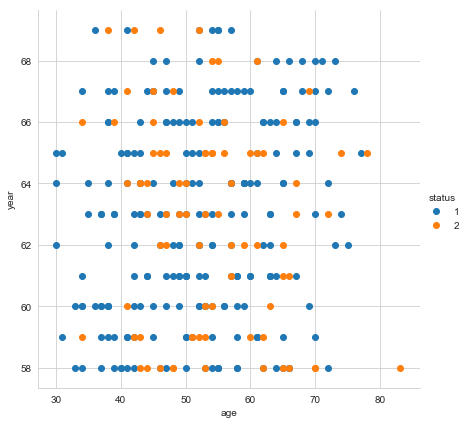

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="status", size=6) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

#Draw scatter plot between Age and year with Status 
#cannot make much sense out it. 


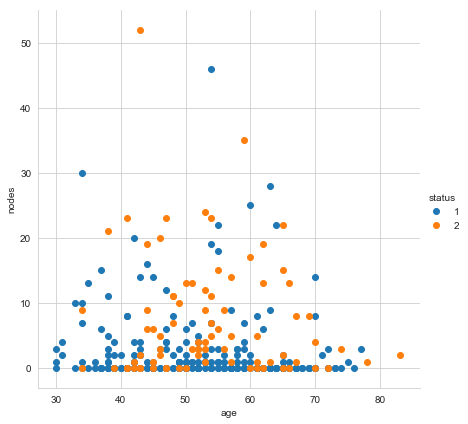

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="status", size=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

#Draw scatter plot between Age and nodes with Status 
#cannot make much sense out it. 


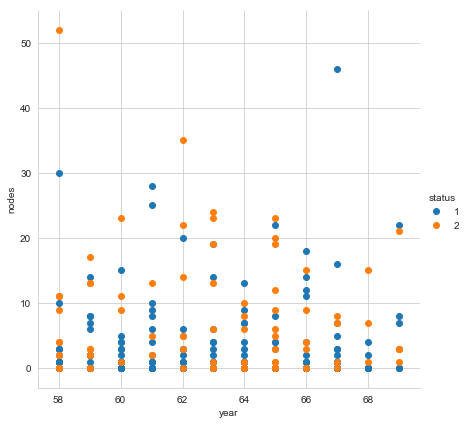

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="status", size=6) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

#Draw scatter plot between year and nodes with Status 
#cannot make much sense out it. 

# Pair-plot

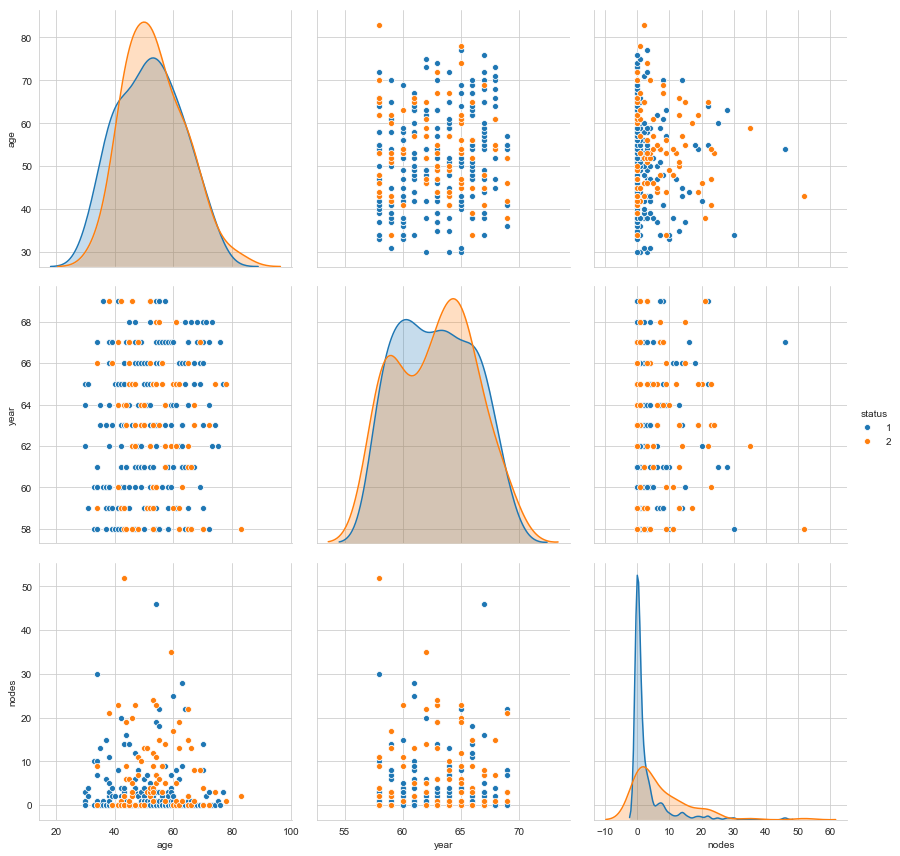

In [15]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Haberman, hue="status",  vars=['age', 'year','nodes'] ,size=4);
plt.show()
#This plot is not much informative we are unable to classify which is the most useful feature because of too much overlappin


Observations
This plot is not much informative we are unable to classify which is the most useful feature because of too much overlapping

# Histogram, PDF, CDF

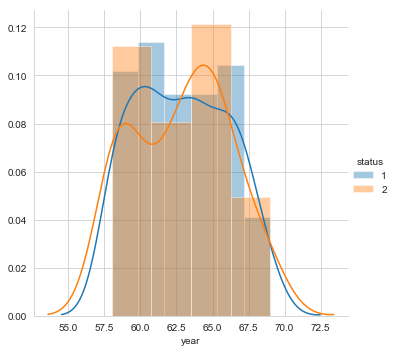

In [16]:
sns.FacetGrid(Haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();



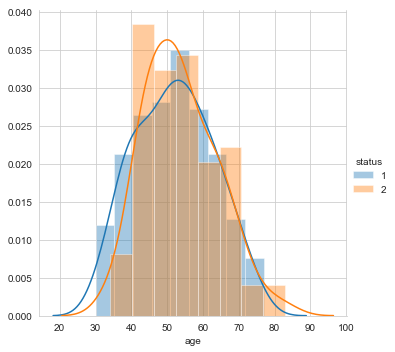

In [17]:
sns.FacetGrid(Haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


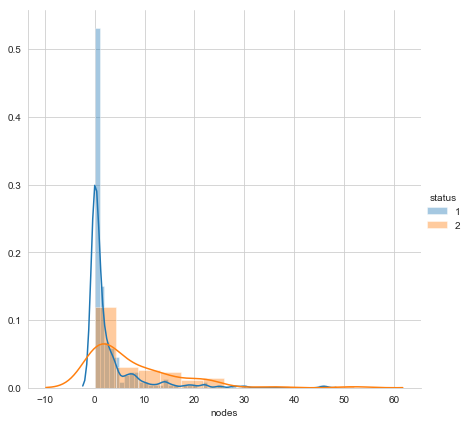

In [18]:
sns.FacetGrid(Haberman, hue="status", size=6) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();


Abobe figure nodes  is clear, we can say that probability distribution function(PDF) of 1 is high when compared to 2
 . node=0 has the highest Survival rate.
 

In [19]:
Haberman_1 = Haberman.loc[Haberman["status"] == 1]
Haberman_2 = Haberman.loc[Haberman["status"] == 2]


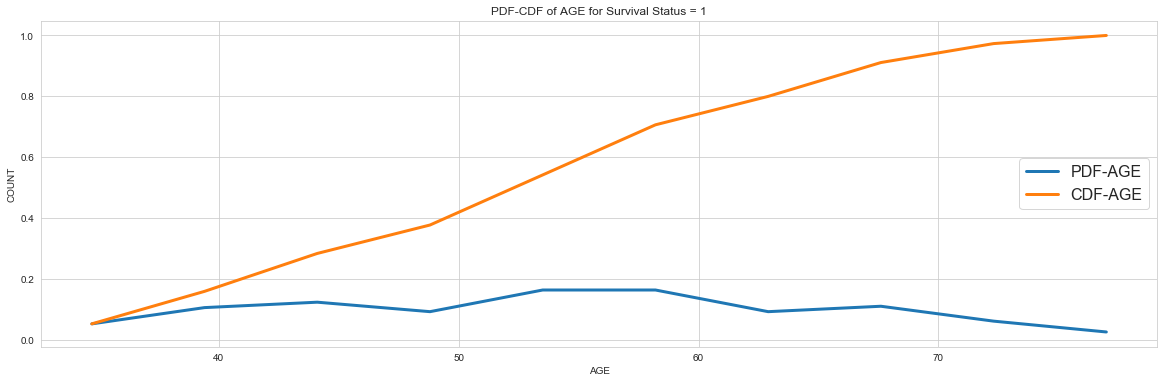

In [20]:


plt.figure(figsize=(20,6))
counts,bin_edges=np.histogram(Haberman_1["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AGE')
plt.title('PDF-CDF of AGE for Survival Status = 1')
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 16})


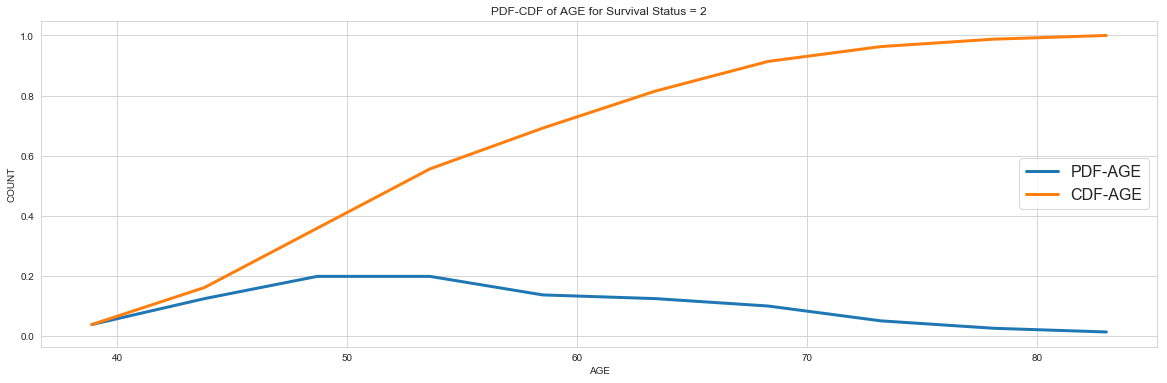

In [21]:


plt.figure(figsize=(20,6))
counts,bin_edges=np.histogram(Haberman_2["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('AGE')
plt.title('PDF-CDF of AGE for Survival Status = 2')
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 16})


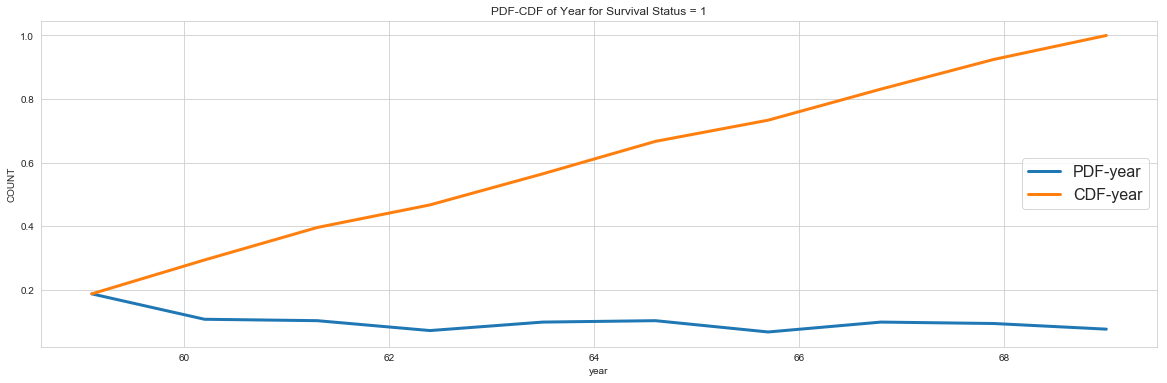

In [22]:
plt.figure(figsize=(20,6))
counts,bin_edges=np.histogram(Haberman_1["year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('year')
plt.title('PDF-CDF of Year for Survival Status = 1')
plt.legend(['PDF-year', 'CDF-year'], loc = 5,prop={'size': 16})

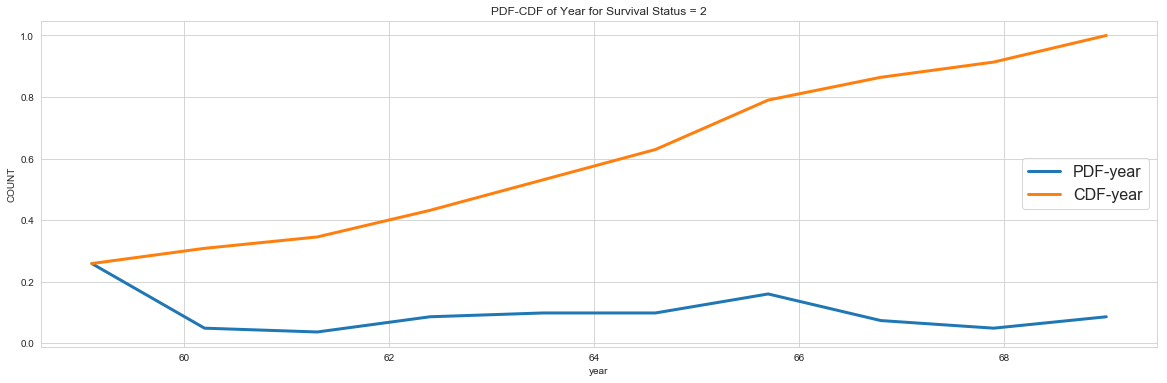

In [23]:
plt.figure(figsize=(20,6))
counts,bin_edges=np.histogram(Haberman_2["year"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('year')
plt.title('PDF-CDF of Year for Survival Status = 2')
plt.legend(['PDF-year', 'CDF-year'], loc = 5,prop={'size': 16})

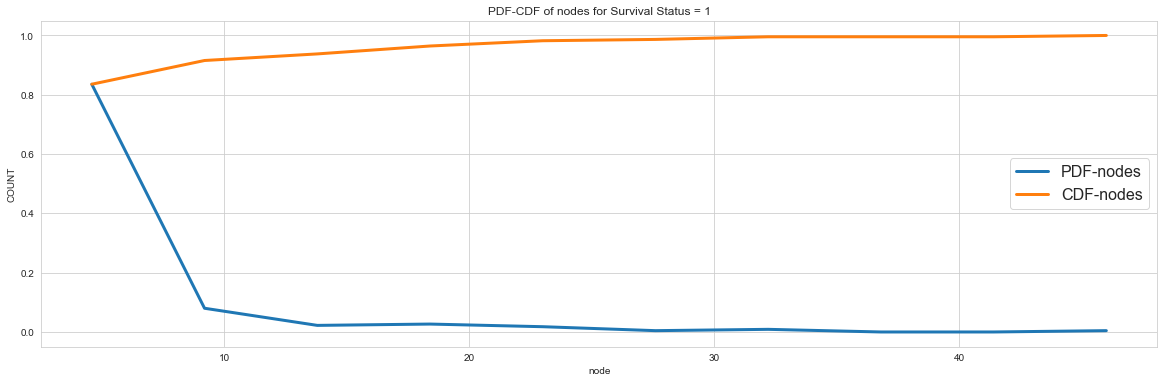

In [24]:
plt.figure(figsize=(20,6))
counts,bin_edges=np.histogram(Haberman_1["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('node')
plt.title('PDF-CDF of nodes for Survival Status = 1')
plt.legend(['PDF-nodes', 'CDF-nodes'], loc = 5,prop={'size': 16})

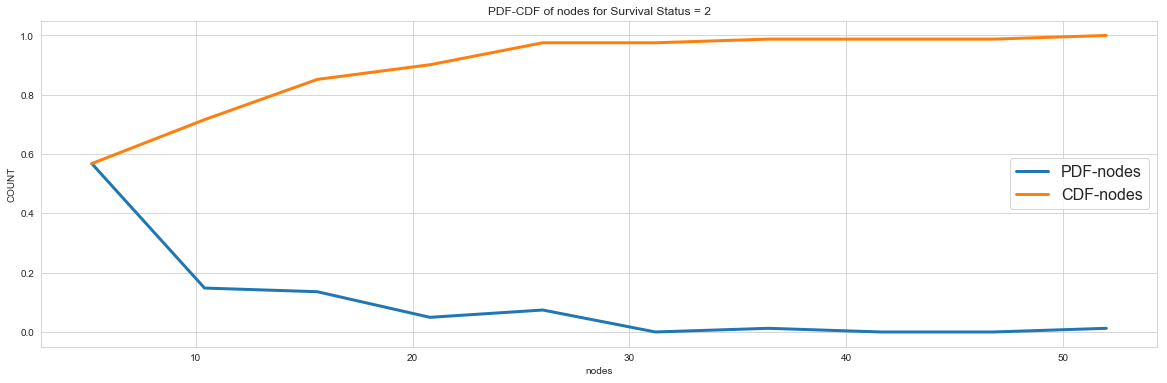

In [25]:
plt.figure(figsize=(20,6))
counts,bin_edges=np.histogram(Haberman_2["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.ylabel("COUNT")
plt.xlabel('nodes')
plt.title('PDF-CDF of nodes for Survival Status = 2')
plt.legend(['PDF-nodes', 'CDF-nodes'], loc = 5,prop={'size': 16})

Observation 
1. near about 80% Survial ( status = 1) whos nodes less then 4.5               
2.People whose age less then 35 their chance more Survial

# Mean, Variance and Std-dev


In [26]:
#Mean, Variance, Std-deviation,  
print("Means: for status =1")
print(np.mean(Haberman_1))
print("Means: for status =2")
print(np.mean(Haberman_2))
print("\nStd-dev: status =1 ");
print(np.std(Haberman_1))
print("\nStd-dev: status =2 ")
print(np.std(Haberman_2))



Means: for status =1
age       52.017778
year      62.862222
nodes      2.791111
status     1.000000
dtype: float64
Means: for status =2
age       53.679012
year      62.827160
nodes      7.456790
status     2.000000
dtype: float64

Std-dev: status =1 
age       10.987655
year       3.215745
nodes      5.857258
status     0.000000
dtype: float64

Std-dev: status =2 
age       10.104182
year       3.321424
nodes      9.128776
status     0.000000
dtype: float64


# Box Plots and Violin Plots

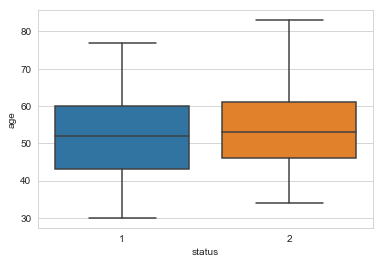

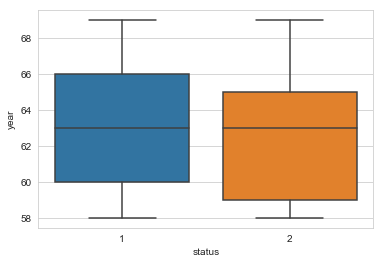

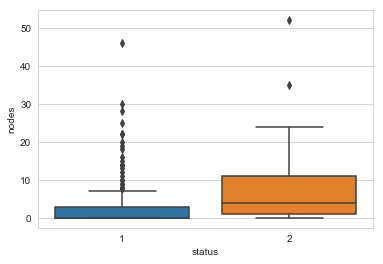

In [27]:
sns.boxplot(x='status',y='age',data=Haberman)
plt.show()
sns.boxplot(x='status',y='year',data=Haberman)
plt.show()
sns.boxplot(x='status',y='nodes',data=Haberman)
plt.show()

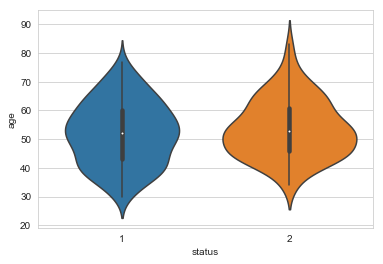

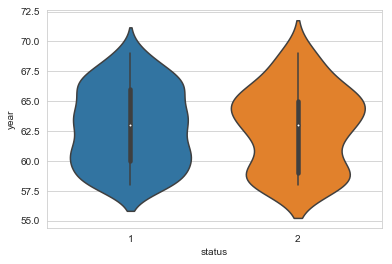

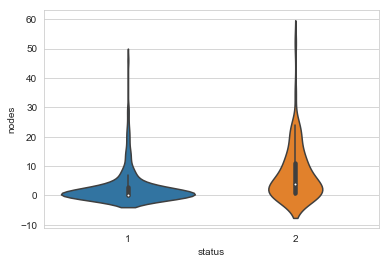

In [28]:
sns.violinplot(x='status',y='age',data = Haberman)
plt.show()
sns.violinplot(x='status',y='year',data = Haberman)
plt.show()
sns.violinplot(x='status',y='nodes',data = Haberman)
plt.show()

Observation :

1. The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

2. Patients with more than 1 nodes are not likely to survive (status=1) . More the number of nodes, lesser the survival chances.              
3 .A large percentage of patients who survived (status=1) had 0 nodes.

# Final Finding

1. Patient’s Age and  year alone are not deciding factors for his/her survival. but people less than 35 years have more chance of survival.

2. Survival chance is inversely proportional to the number of positive nodes. We also saw that the absence of positive nodes cannot always guarantee survival.

3. The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalance